In [1]:
import numpy as np

import pandas as pd

import statsmodels.api as sm

from scipy.stats import norm
import statsmodels.formula.api as smf

from semopy import Model, semplot

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
def compute_indirect_effect(constituens):
    """Compute the indirect effect for a set of constituents
    """
    constituents = np.array(constituens)
    indirect_effect = np.prod(constituents)
    return indirect_effect

def compute_sobel_test(iv_coef, md_coef, se_iv_coef, se_md_coef, one_sided=True):
    """Compute the sobel test for a mediation
    """
    first_term = iv_coef*md_coef
    second_term = np.sqrt((iv_coef**2 * se_md_coef**2)
        + (md_coef**2 * se_iv_coef**2) + (se_iv_coef**2 * se_md_coef**2)) 
    z = first_term / second_term
    if one_sided:
        p = norm.sf(abs(z))
    else:
        p = norm.sf(abs(z))*2
    return z, p

In [3]:
df = pd.read_csv('lab_data_1.csv')

Q1 Spend some time looking at the dataset. 

In [4]:
df.head()

,id,gender,age,SES,ethnicity,service,waitlist,therapy,sessions,life,esteem,satis,ces_pre,ces_post,TA
0,1.0,2,38.0,1,2,1,3.0,3,11.0,6.0,6.0,9.0,38.0,39.0,9.0
1,2.0,1,40.0,1,2,1,13.0,1,13.0,5.0,7.0,8.0,36.0,30.0,21.0
2,3.0,1,33.0,1,2,1,1.0,1,3.0,4.0,7.0,5.0,39.0,21.0,18.0
3,4.0,2,35.0,1,2,1,7.0,1,5.0,4.0,4.0,8.0,41.0,39.0,6.0
4,5.0,1,32.0,1,2,1,2.0,3,8.0,5.0,5.0,4.0,39.0,39.0,6.0


In [5]:
df.describe()

,id,gender,age,SES,ethnicity,service,waitlist,therapy,sessions,life,esteem,satis,ces_pre,ces_post,TA
count,298.000000,298.000000,298.000000,298.000000,298.000000,298.000000,298.000000,298.000000,298.000000,298.000000,298.000000,298.000000,298.000000,298.000000,298.000000
mean,149.500000,1.362416,37.895973,2.647651,2.352349,1.523490,6.597315,2.013423,9.369128,6.201342,6.261745,6.677852,38.973154,29.013423,12.845638
std,86.169407,0.481507,10.861196,1.057287,1.011721,0.500288,5.118027,0.803918,3.088698,1.725155,1.922386,1.970382,5.128578,8.637080,5.246419
min,1.000000,1.000000,17.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,2.000000,2.000000,22.000000,6.000000,6.000000
25%,75.250000,1.000000,29.000000,2.000000,2.000000,1.000000,3.000000,1.000000,8.000000,5.000000,5.000000,5.000000,36.000000,24.000000,9.000000
50%,149.500000,1.000000,37.000000,3.000000,2.000000,2.000000,5.000000,2.000000,10.000000,6.000000,6.000000,7.000000,39.000000,30.000000,12.000000
75%,223.750000,2.000000,46.000000,4.000000,3.000000,2.000000,9.000000,3.000000,12.000000,8.000000,8.000000,8.000000,42.750000,36.000000,15.000000
max,298.000000,2.000000,66.000000,4.000000,4.000000,2.000000,26.000000,3.000000,15.000000,10.000000,10.000000,10.000000,56.000000,42.000000,30.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 298 entries, 0 to 297
Data columns (total 15 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   id         298 non-null    float64
 1   gender     298 non-null    int64  
 2   age        298 non-null    float64
 3   SES        298 non-null    int64  
 4   ethnicity  298 non-null    int64  
 5   service    298 non-null    int64  
 6   waitlist   298 non-null    float64
 7   therapy    298 non-null    int64  
 8   sessions   298 non-null    float64
 9   life       298 non-null    float64
 10  esteem     298 non-null    float64
 11  satis      298 non-null    float64
 12  ces_pre    298 non-null    float64
 13  ces_post   298 non-null    float64
 14  TA         298 non-null    float64
dtypes: float64(10), int64(5)
memory usage: 35.0 KB


Q2 The research team were interested in testing whether self-esteem measured prior to treatment negatively predicted post-treatment levels of depression, via its positive effects on the therapeutic alliance between the patient and therapist.  
  
Draw a path diagram of this mediation model. Indicate on the path model the hypothesised direction of relationships between the three variables.

Q3	Carry out a multiple regression to calculate the direct path coefficients (i.e. beta weights) for the following relationships: SE and TA predicting Dep; and SE predicting TA. Note these direct effects below.

In [7]:
dep_model = smf.ols('ces_post ~ esteem + TA', data=df)
res = dep_model.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               ces_post   R-squared:                       0.049
Model:                            OLS   Adj. R-squared:                  0.042
Method:                 Least Squares   F-statistic:                     7.585
Date:                Mon, 22 Mar 2021   Prob (F-statistic):           0.000614
Time:                        12:04:35   Log-Likelihood:                -1057.4
No. Observations:                 298   AIC:                             2121.
Df Residuals:                     295   BIC:                             2132.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     32.1275      1.939     16.571      0.000      28.312      35.943
esteem        -0.9099      0.258     -3.531      0.000      -1.417      -0.403
TA             0.2011      0.094      2.130      0.034       0.015       0.387
==============================================================================
Omnibus:                       16.981   Durbin-Watson:                   1.814
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               18.521
Skew:                          -0.593   Prob(JB):                     9.51e-05
Kurtosis:                       2.706   Cond. No.                         60.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [8]:
ta_model = smf.ols('TA ~ esteem', data=df)
res = ta_model.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     TA   R-squared:                       0.020
Model:                            OLS   Adj. R-squared:                  0.017
Method:                 Least Squares   F-statistic:                     6.112
Date:                Mon, 22 Mar 2021   Prob (F-statistic):             0.0140
Time:                        12:04:35   Log-Likelihood:                -913.25
No. Observations:                 298   AIC:                             1830.
Df Residuals:                     296   BIC:                             1838.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     10.4151      1.028     10.128      0.000       8.391      12.439
esteem         0.3882      0.157      2.472      0.014       0.079       0.697
==============================================================================
Omnibus:                       29.882   Durbin-Watson:                   1.986
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               36.026
Skew:                           0.839   Prob(JB):                     1.50e-08
Kurtosis:                       3.298   Cond. No.                         22.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Q4 Calculate the indirect effect of SE on Dep via TA

In [9]:
compute_indirect_effect([0.38, 0.20])

0.07600000000000001

Q5 Run a regression model with SE on its own predicting Dep. Compare the beta weight from this model with the beta weight obtained when TA was included with SE in the model predicting Dep. Do the researchers appear to have any support for their mediation hypothesis?

In [10]:
dep_model = smf.ols('ces_post ~ esteem', data=df)
res = dep_model.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               ces_post   R-squared:                       0.034
Model:                            OLS   Adj. R-squared:                  0.031
Method:                 Least Squares   F-statistic:                     10.51
Date:                Mon, 22 Mar 2021   Prob (F-statistic):            0.00132
Time:                        12:04:35   Log-Likelihood:                -1059.7
No. Observations:                 298   AIC:                             2123.
Df Residuals:                     296   BIC:                             2131.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     34.2224      1.681     20.362      0.000      30.915      37.530
esteem        -0.8319      0.257     -3.242      0.001      -1.337      -0.327
==============================================================================
Omnibus:                       17.118   Durbin-Watson:                   1.852
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               18.821
Skew:                          -0.601   Prob(JB):                     8.19e-05
Kurtosis:                       2.733   Cond. No.                         22.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Q9	Extract the relevant material from models you have run above, and run the Sobel test on the indirect effect using this web-based test: http://quantpsy.org/sobel/sobel.htm
Is there any evidence for a significant indirect effect? (You can also obtain this using the medmod module in Jamovi). Report the z score and significance test. 

In [11]:
z, p = compute_sobel_test(
    iv_coef=0.3882, 
    md_coef=0.2011, 
    se_iv_coef=0.157, 
    se_md_coef=0.094, 
    one_sided=False
)
print(f'Z value {z} and p value {p}')

Z value 1.5471067621051926 and p value 0.12183750362963973


Q10 Find some basic descriptive statistics for the variables in the dataset by running the following syntax in the script file: 
describe(SPSS_dataset_SEM_1). Why should we only selectively interpret this output for a variable like 'gender'?

In [12]:
sem_df = pd.read_spss('lab_data_2.sav')

In [13]:
sem_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 298 entries, 0 to 297
Data columns (total 15 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   id         298 non-null    float64 
 1   gender     298 non-null    category
 2   age        298 non-null    float64 
 3   SES        298 non-null    category
 4   ethnicity  298 non-null    category
 5   service    298 non-null    category
 6   waitlist   298 non-null    float64 
 7   therapy    298 non-null    category
 8   sessions   298 non-null    float64 
 9   life       298 non-null    float64 
 10  esteem     298 non-null    float64 
 11  satis      298 non-null    float64 
 12  ces_pre    298 non-null    float64 
 13  ces_post   298 non-null    float64 
 14  TA         298 non-null    float64 
dtypes: category(5), float64(10)
memory usage: 25.5 KB


In [14]:
sem_df.describe()

,id,age,waitlist,sessions,life,esteem,satis,ces_pre,ces_post,TA
count,298.000000,298.000000,298.000000,298.000000,298.000000,298.000000,298.000000,298.000000,298.000000,298.000000
mean,149.500000,37.895973,6.597315,9.369128,6.201342,6.261745,6.677852,38.973154,29.013423,12.845638
std,86.169407,10.861196,5.118027,3.088698,1.725155,1.922386,1.970382,5.128578,8.637080,5.246419
min,1.000000,17.000000,1.000000,1.000000,2.000000,2.000000,2.000000,22.000000,6.000000,6.000000
25%,75.250000,29.000000,3.000000,8.000000,5.000000,5.000000,5.000000,36.000000,24.000000,9.000000
50%,149.500000,37.000000,5.000000,10.000000,6.000000,6.000000,7.000000,39.000000,30.000000,12.000000
75%,223.750000,46.000000,9.000000,12.000000,8.000000,8.000000,8.000000,42.750000,36.000000,15.000000
max,298.000000,66.000000,26.000000,15.000000,10.000000,10.000000,10.000000,56.000000,42.000000,30.000000


Q2 We can take a visual look at the relationships between some of the variables in our dataset using a pairplot.

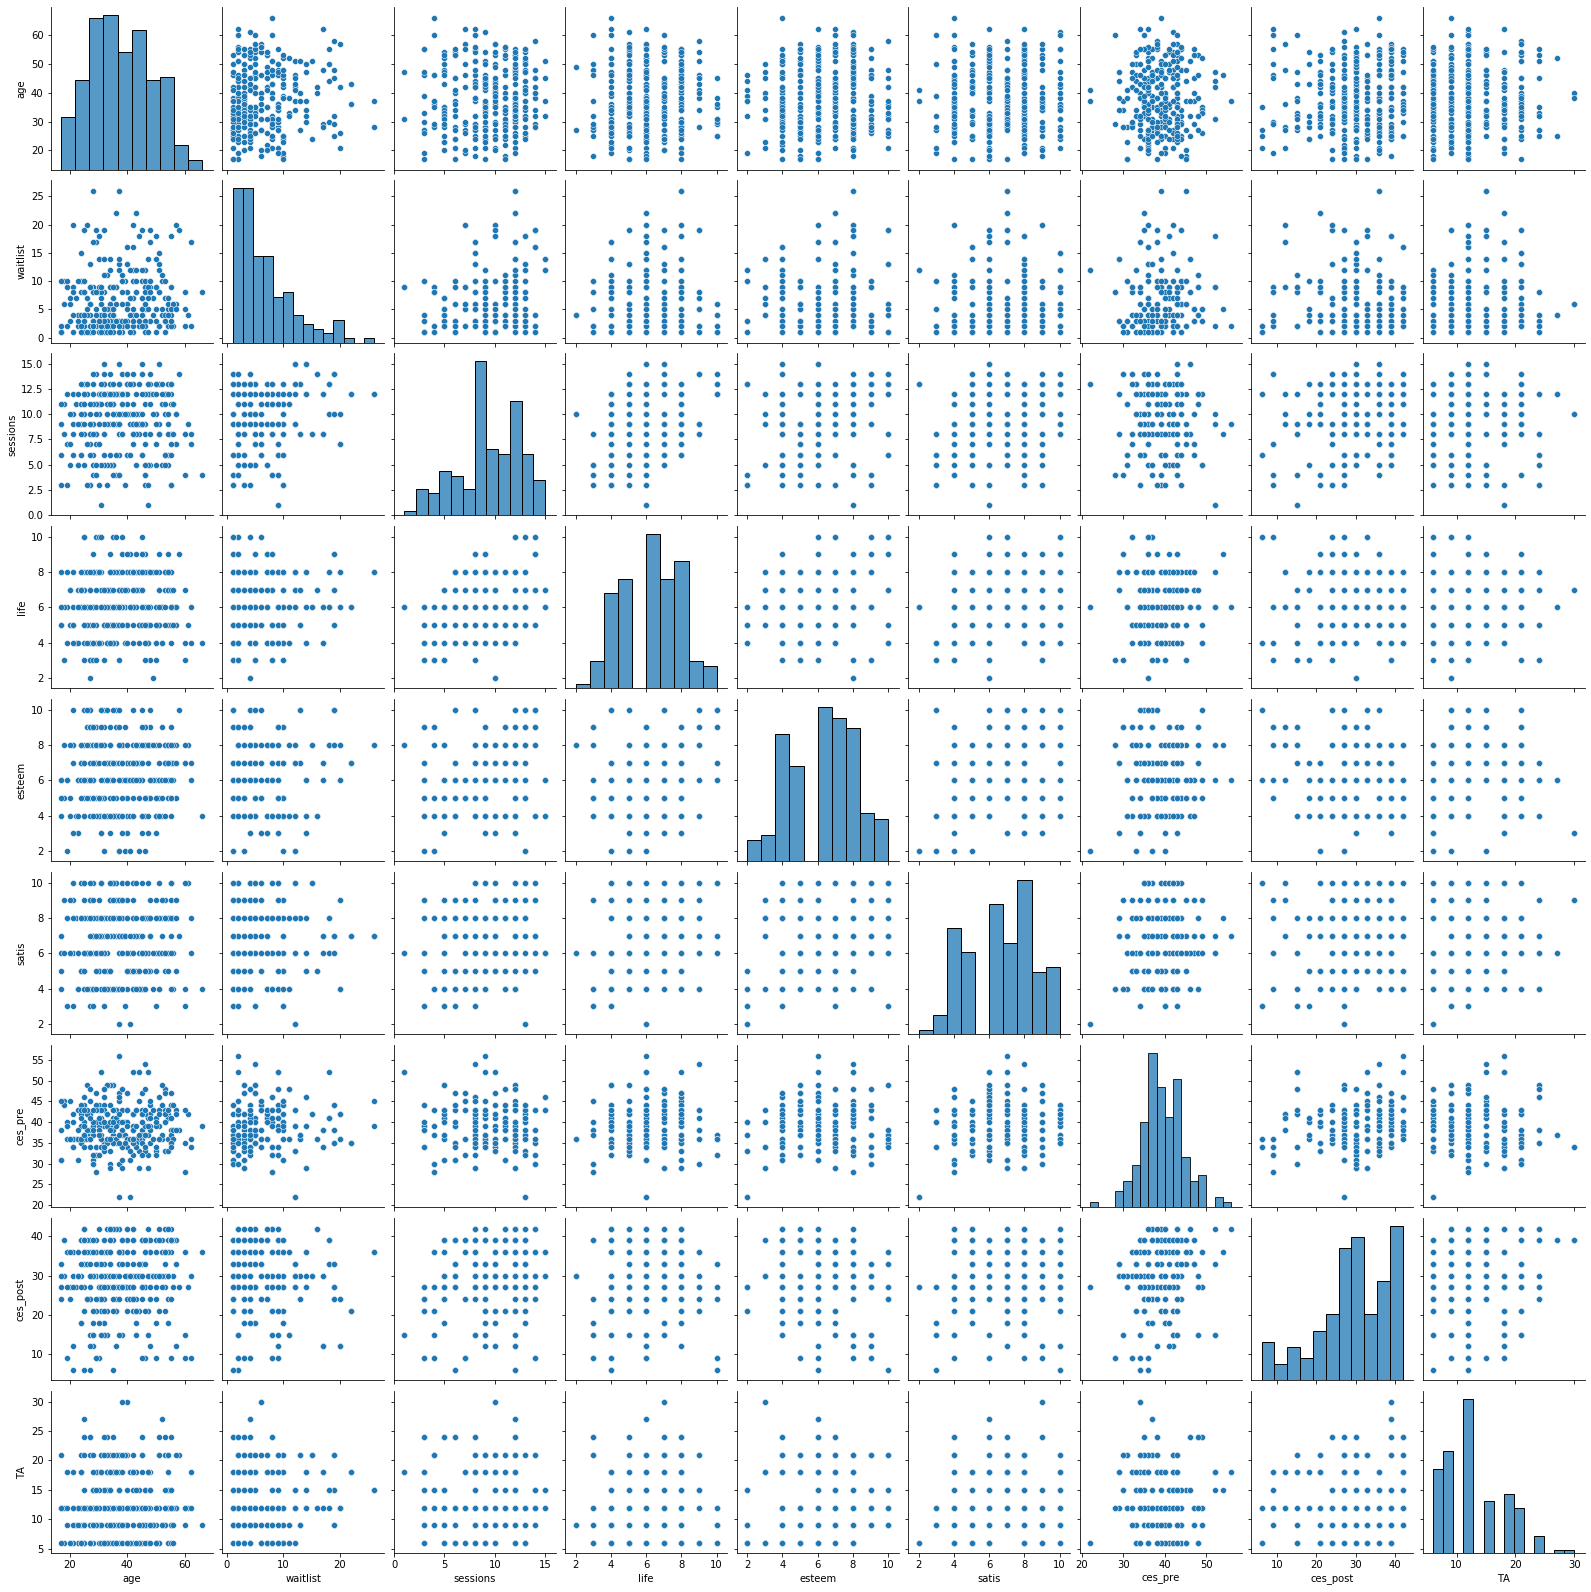

In [15]:
sns.pairplot(sem_df[['age', 'waitlist', 'sessions', 'life', 'esteem', 'satis', 'ces_pre', 'ces_post', 'TA']])

Q3 Produce bivariate correlations for all of our variables

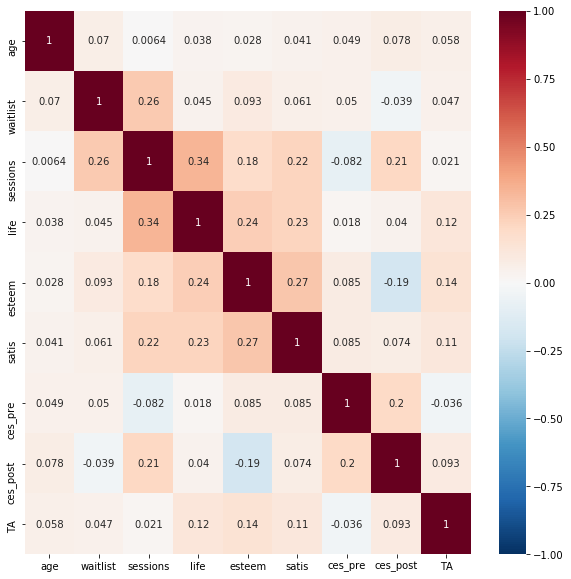

In [16]:
plt.figure(figsize=(10, 10))
sns.heatmap(
    sem_df[['age', 'waitlist', 'sessions', 'life', 'esteem', 'satis', 'ces_pre', 'ces_post', 'TA']].corr(),
    cmap='RdBu_r',
    annot=True,
    vmin=-1,
    vmax=1
)

Q14 Run the mediation model we looked above

In [17]:
model_description="""
TA ~ esteem
ces_post ~ esteem + TA
"""
mod = Model(model_scription)
res = mod.fit(sem_df)
print(res) 

Name of objective: MLW
Optimization method: SLSQP
Optimization successful.
Optimization terminated successfully
Objective value: 0.000
Number of iterations: 29
Params: 0.388 -0.910 0.202 70.720 26.877


In [18]:
ins = mod.inspect()
print(ins)

       lval  op      rval   Estimate  Std. Err    z-value   p-value
0        TA   ~    esteem   0.388406  0.156484   2.482076  0.013062
1  ces_post   ~    esteem  -0.909704  0.256446  -3.547351  0.000389
2  ces_post   ~        TA   0.201526  0.093967   2.144653  0.031981
3        TA  ~~        TA  26.876906  2.201842  12.206556  0.000000
4  ces_post  ~~  ces_post  70.720005  5.793609  12.206556  0.000000


In [19]:
compute_indirect_effect([0.3884, 0.20152])

0.078270368

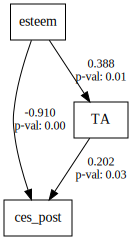

In [23]:
semplot(mod, 'results//ta_mediation.png')

Q15. The research team wanted to add a further variable to the mediation model. In this case, they wanted to add patient satisfaction with service treatment as an additional mediator between SE and Depression in the model. Patient satisfaction and TA would have no specified relationship in the model. Try drawing this model below before you run the analysis. This model is an example of what is often called observed variable path analysis. This is the precursor to looking at full SEM next week.

In [24]:
model_scription="""
satis ~ esteem
TA ~ esteem
ces_post ~ esteem + TA + satis
"""
mod = Model(model_scription)
res = mod.fit(sem_df)
print(res) 

Name of objective: MLW
Optimization method: SLSQP
Optimization successful.
Optimization terminated successfully
Objective value: 0.006
Number of iterations: 38
Params: 0.282 0.388 -1.060 0.186 0.553 69.611 3.577 26.875


In [25]:
ins = mod.inspect()
print(ins)

       lval  op      rval   Estimate  Std. Err    z-value       p-value
0     satis   ~    esteem   0.281790  0.057087   4.936185  7.966563e-07
1        TA   ~    esteem   0.388065  0.156478   2.480001  1.313820e-02
2  ces_post   ~    esteem  -1.060026  0.264417  -4.008922  6.099647e-05
3  ces_post   ~        TA   0.185896  0.093230   1.993938  4.615887e-02
4  ces_post   ~     satis   0.553227  0.255550   2.164848  3.039936e-02
5     satis  ~~     satis   3.576895  0.293031  12.206556  0.000000e+00
6        TA  ~~        TA  26.874667  2.201659  12.206556  0.000000e+00
7  ces_post  ~~  ces_post  69.610569  5.702720  12.206556  0.000000e+00


In [26]:
compute_indirect_effect([0.281790, 0.388065, 0.185896, 0.553227])

0.011246139454818749

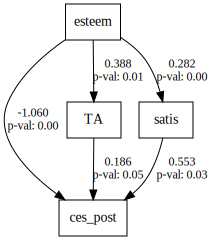

In [27]:
semplot(mod, 'results//ta_satis_mediation.png')